In [1]:
#environment is Python 3.6, tensorflow 1.6

In [1]:
from Taffetas.Taffetas import service_operator
from Taffetas.ImageDataGenerator.ImageDataGenerator_single import batch_data_generator
from example_config_transfer_learning import system_setting
import tensorflow as tf
from matplotlib import pyplot as plt
import os
import multiprocessing 
import subprocess

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import tensorflow as tf

In [3]:
system_setting['logdir']

'/log'

In [4]:
#start TensorBoard 
# the default TensorBoard is http://localhost:6006/
def start_TensorBoard(log_path):
    log_path='--logdir='+log_path
    subprocess.call(['tensorboard',log_path])
p = multiprocessing.Process(target=start_TensorBoard, args=(system_setting['logdir'],))
p.start()

In [5]:
#set the name of this job
system_setting['model_name']= 'example_transfer_learning'

[**The data can be downloaded at here**](https://www.kaggle.com/c/state-farm-distracted-driver-detection)<br>

In [6]:
# define data augmentation algorithms
setting={
    #'rotation_range': 100,
    'width_shift_range':0.05,
    'height_shift_range':0.05,
    #'zoom_range':[1/1.2,1.2],
    'fill_mode':'nearest',
    'cval':0,
    'horizontal_flip':True,
    #'vertical_flip':True,
}

In [7]:
#resize image to (299,299)
#filepath is the 'train' folder path of the download data
filepath='/dataHDD/hdd1/hdd1/other/drive/train'
batch_generator=batch_data_generator(image_size=(299,299),resize=True,num_threads=8)
#split 10% data as a validation set from the training set 
train_batch=batch_generator.get_batch(filepath,batch_size=32,preprocessing_setting=setting,
                                      batch_type='balance',split=0.1,tf_train='True')
validation_set=batch_generator.validation_set

In [8]:
#show classes
batch_generator.classes_dict

{'c0': 0,
 'c1': 1,
 'c2': 2,
 'c3': 3,
 'c4': 4,
 'c5': 5,
 'c6': 6,
 'c7': 7,
 'c8': 8,
 'c9': 9}

In [9]:
#step of each epoch
batch_generator.epoch

700

In [10]:
#set your training parameters 
train_op=service_operator(train_batch,system_setting=system_setting)

init test
init End


In [11]:
transfer_variables = train_op.custom_setting['transfer_variables']

In [12]:
model_path = os.path.join(system_setting['logdir'],'example','model','example-100')

In [ ]:
train_op.restore_checking_point_with_variables(model_path,transfer_variables)

In [ ]:
#Start training
train_op.fit_generator(validation_set,steps_per_epoch=700,validation_steps=700,epochs=10,
                      learning_rate_decay_dict=False,learning_rate=0.0001,dropout_keep_prob=0.8,initial_epoch=0)

Current Step is 700 Current Epoch is 1
Current Step is 1400 Current Epoch is 2
Current Step is 2100 Current Epoch is 3
Current Step is 2800 Current Epoch is 4
Current Step is 3500 Current Epoch is 5
Current Step is 4200 Current Epoch is 6
Current Step is 4900 Current Epoch is 7
Current Step is 5600 Current Epoch is 8
Current Step is 6300 Current Epoch is 9
Current Step is 7000 Current Epoch is 10


In [13]:
train_op.dropout_keep_prob=0.8

Your Class is c4


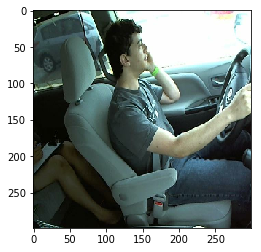

Your Class is c3


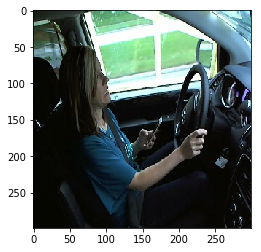

Your Class is c6


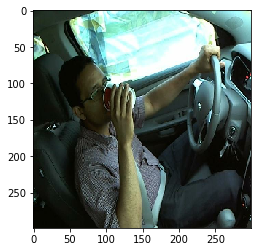

Your Class is c1


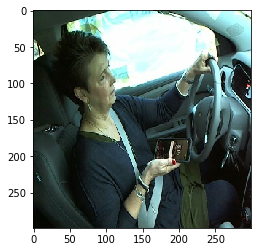

Your Class is c7


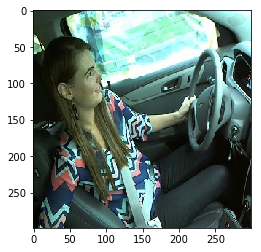

Your Class is c8


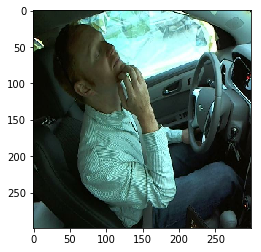

'\nc0: safe driving\nc1: texting - right\nc2: talking on the phone - right\nc3: texting - left\nc4: talking on the phone - left\nc5: operating the radio\nc6: drinking\nc7: reaching behind\nc8: hair and makeup\nc9: talking to passenger\n'

In [13]:
#define a jpeg reader
def tf_image_reader():
    image_path_tensor = tf.placeholder(tf.string,name='image_path_tensor')
    image_contents = tf.read_file(image_path_tensor)
    image = tf.image.decode_jpeg(image_contents, channels=3)
    image_tensor=tf.image.resize_images(image,(299,299),method=1)
    sess=tf.Session()
    return image_path_tensor,image_tensor,sess

image_path_tensor,image_tensor,sess = tf_image_reader()    

#Show all predictions of test files 
current_dir = system_setting['current_dir']
test_files_path = os.path.join(current_dir,'test_image')
test_files = os.listdir(test_files_path)
for filename in test_files:
    image_path = os.path.join(test_files_path,filename)
    image = sess.run(image_tensor,feed_dict={image_path_tensor:image_path})
    
    pred=train_op.predict([[image]])[0]
    pred_class=list(batch_generator.classes_dict.keys())[pred.argmax(1)[0]]
    print("Your Class is %s" %pred_class)
    
    plt.imshow(image)
    plt.show()
    
'''
c0: safe driving
c1: texting - right
c2: talking on the phone - right
c3: texting - left
c4: talking on the phone - left
c5: operating the radio
c6: drinking
c7: reaching behind
c8: hair and makeup
c9: talking to passenger
'''